In [1]:
! git clone https://github.com/yashilvora19/CSE-151-EEG-Project.git

fatal: destination path 'CSE-151-EEG-Project' already exists and is not an empty directory.


In [2]:
# import libraries, other imports are as we go through encoding
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
accident = pd.read_csv('/content/CSE-151-EEG-Project/accident_data.csv')
accident.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


## Data Cleaning

In [4]:
accident.shape

(660679, 14)

In [5]:
# get all the datatypes
# date is a str
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [6]:
# number of unique values in each column
for col in accident.columns:
  print(f'{col}: {accident[col].nunique()}')

Index: 421020
Accident_Severity: 3
Accident Date: 1461
Latitude: 511618
Light_Conditions: 5
District Area: 422
Longitude: 529766
Number_of_Casualties: 36
Number_of_Vehicles: 19
Road_Surface_Conditions: 5
Road_Type: 5
Urban_or_Rural_Area: 3
Weather_Conditions: 8
Vehicle_Type: 16


In [7]:
# make a copy of accident dataframe
accident_copy = accident.copy()

In [8]:
# get general idea of min max for the numerical columns (no anomalies)
accident_copy.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


Accident_Severity

In [9]:
# turning Severity into numbers
to_num = {'Serious': 1, 'Slight': 0 , 'Fatal': 2}
accident_copy['Accident_Severity'] = accident['Accident_Severity'].replace(to_num)

Accident Date

In [10]:
# turn dates column into three columns: day, month, year
accident_copy['Day'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[0]))
accident_copy['Month'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[1]))
accident_copy['Year'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[2]))

Light_Conditions

In [11]:
# assume NaN for 'Darkness - lighting unknown'
accident_copy['Light_Conditions'] = accident['Light_Conditions'].replace('Darkness - lighting unknown', np.NaN)

District Area

In [12]:
# rename District Area so it is consistent in column formatting
accident_copy = accident_copy.rename(columns={'District Area': 'District_Area'})


Weather_Conditions

In [13]:
# weather conditions seem to have combinations, so we could one hot encode it instead
# the categories include 'Fine', 'High Winds', 'Raining', 'Snowing', 'Fog or mist', 'Other'

# first split up the labels into lists
accident_copy['Weather_Conditions'] = accident['Weather_Conditions'].apply(
    lambda x: ['Fine'] if x == 'Fine no high winds'
    else ['Raining'] if x == 'Raining no high winds'
    else ['Fine', 'High winds'] if x == 'Fine + high winds'
    else ['Raining', 'High winds'] if x == 'Raining + high winds'
    else ['Snowing'] if x == 'Snowing no high winds'
    else ['Fog or mist'] if x == 'Fog or mist'
    else ['Snowing', 'High winds'] if x == 'Snowing + high winds'
    else ['Other'] if x == 'Other'
    else np.NaN
)

Vehicle_Type

In [14]:
# assume NaN for 'Data missing or out of range'
accident_copy['Vehicle_Type'] = accident['Vehicle_Type'].replace('Data missing or out of range', np.NaN)

In [15]:
# find out the current number of missing values in the dataset
accident_copy.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions            6484
District_Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   6
Day                            0
Month                          0
Year                           0
dtype: int64

In [16]:
# drop all NaN values
accident_copy = accident_copy.dropna()
# Also drop Accident Date column
accident_copy = accident_copy.drop(columns='Accident Date')
print(f'Before dropping missing values: {accident.shape[0]} rows')
print(f'After dropping missing values: {accident_copy.shape[0]} rows')

Before dropping missing values: 660679 rows
After dropping missing values: 638025 rows


In [17]:
# cleaned, but before encoding
accident_copy.head()

,Index,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year
0,200701BS64157,1,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,[Fine],Car,5,6,2019
1,200701BS65737,1,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,[Raining],Car,2,7,2019
3,200701BS66128,1,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,[Fine],Bus or coach (17 or more pass seats),16,8,2019
5,200701BS67159,1,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,[Fine],Car,18,9,2019
6,200701BS67207,1,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,[Fine],Van / Goods 3.5 tonnes mgw or under,5,9,2019


## Exploring Data

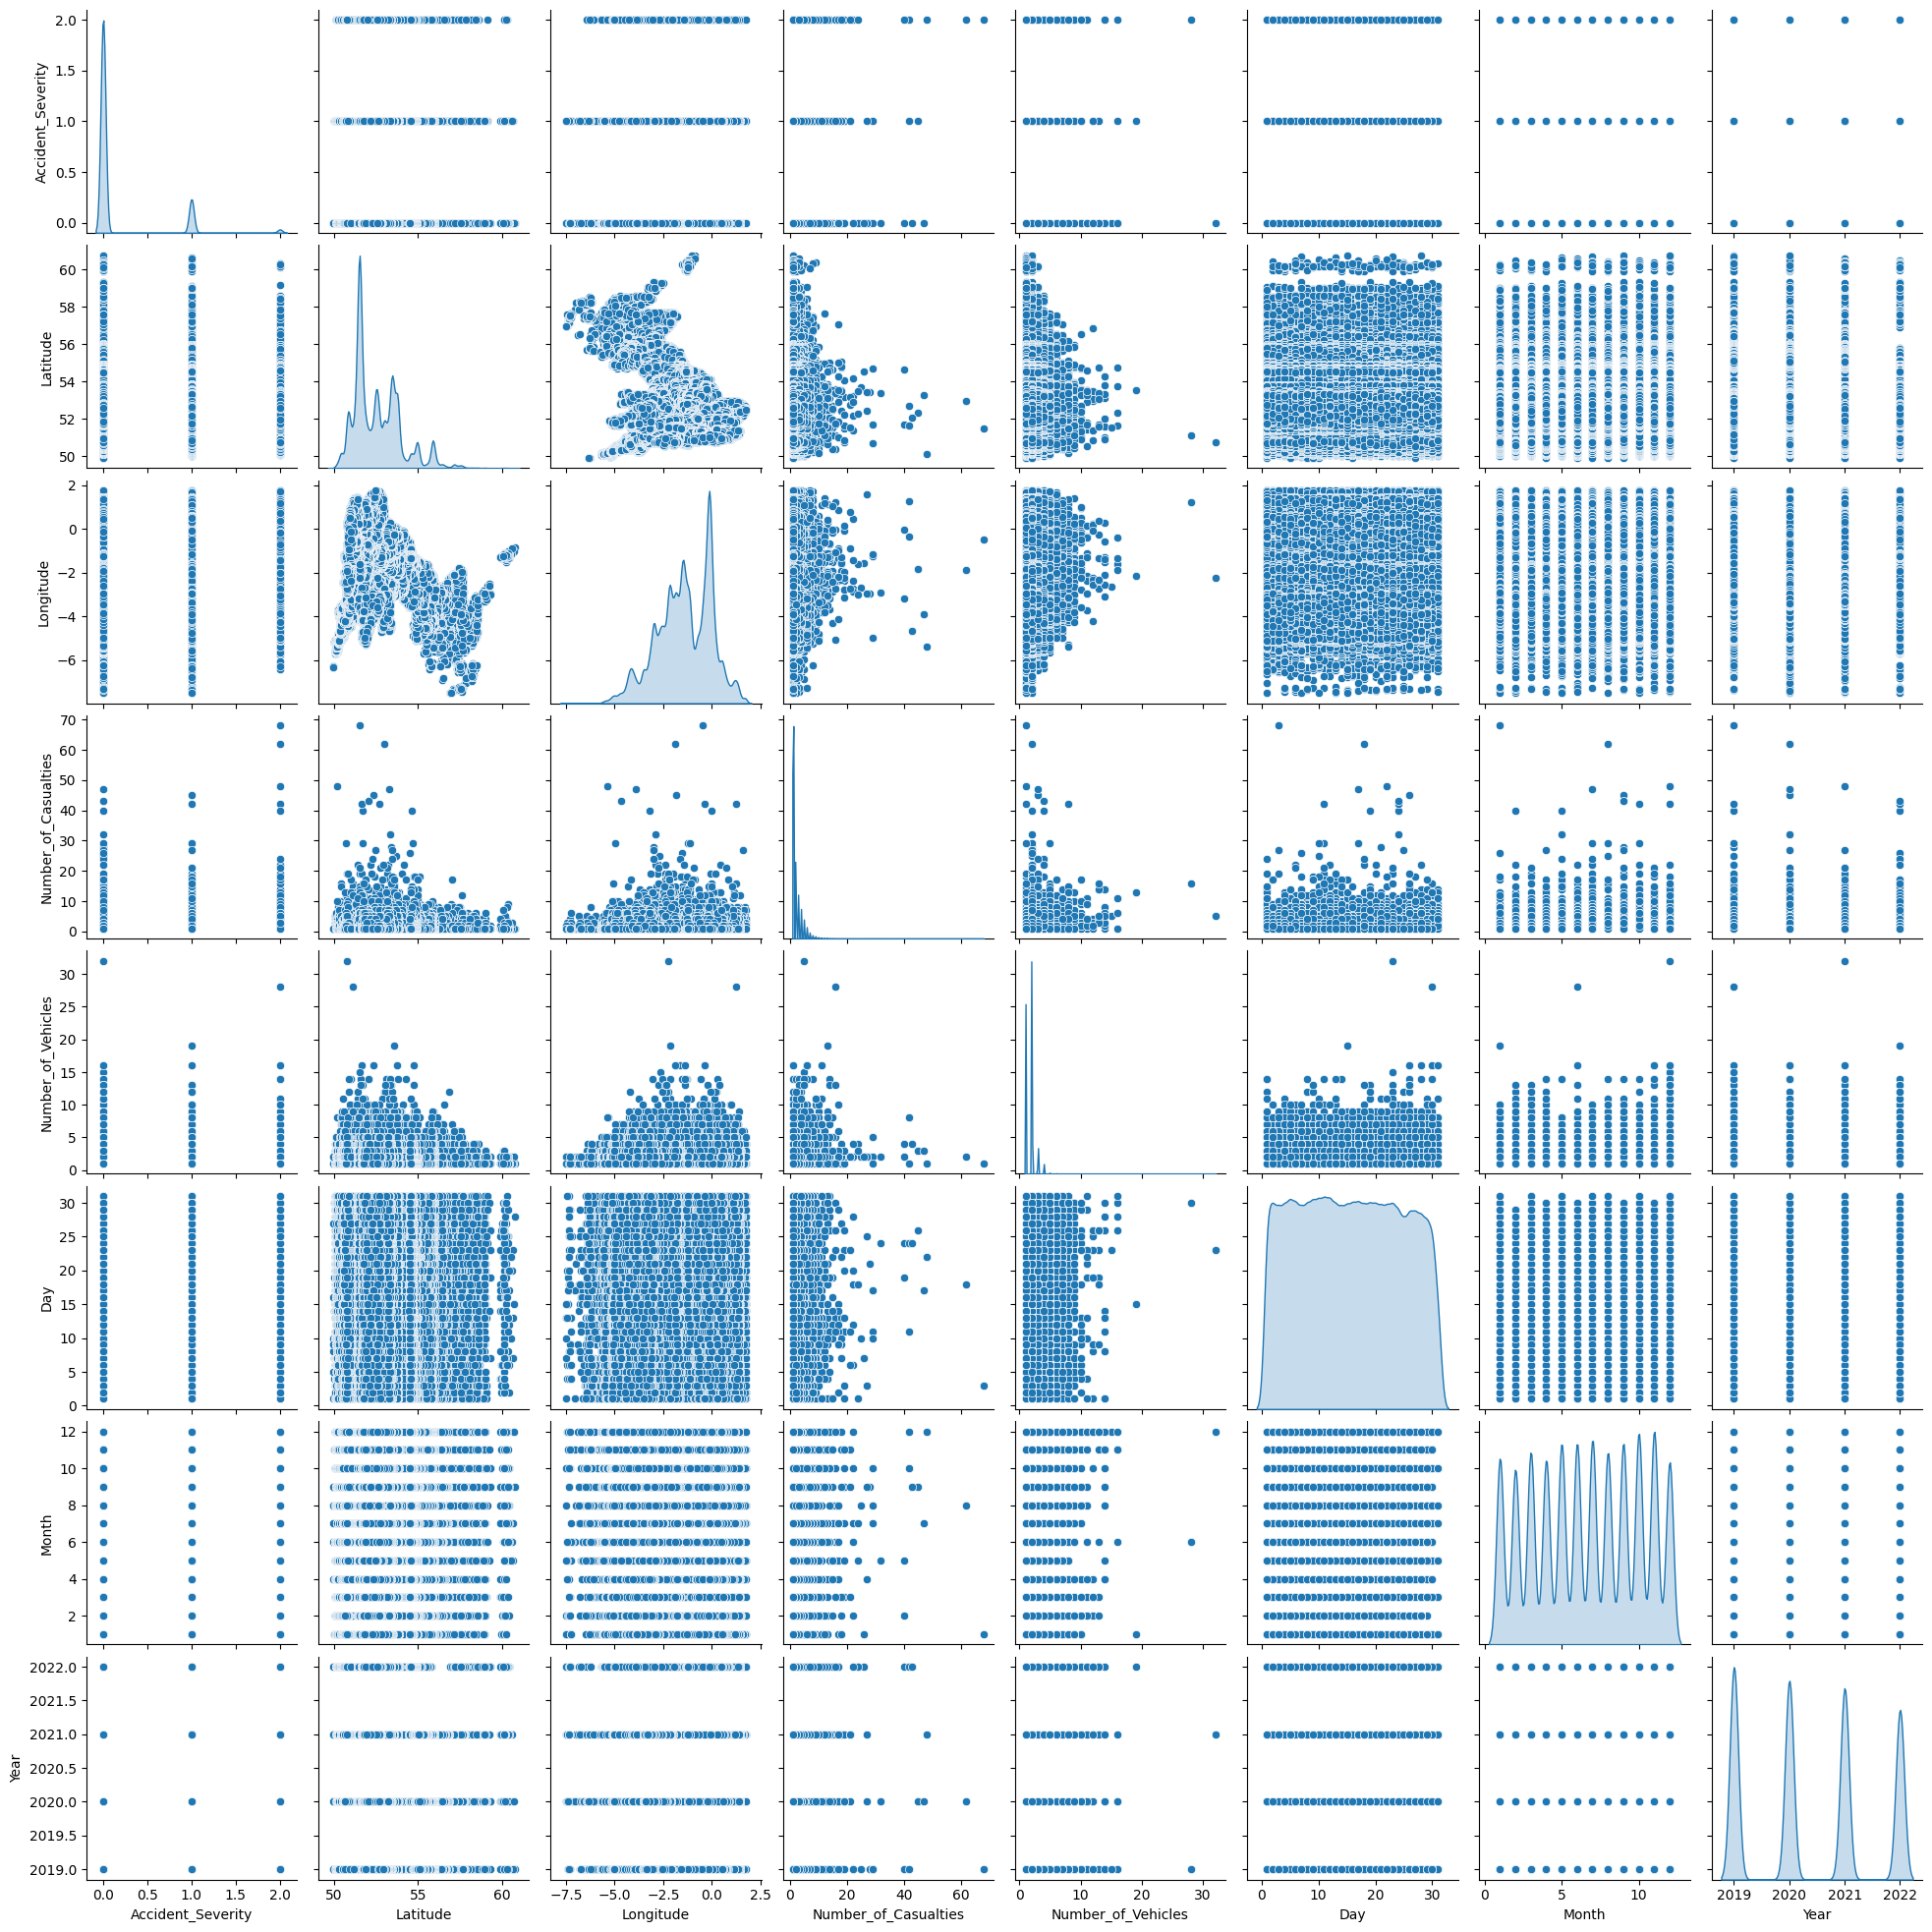

In [18]:
sns.pairplot(accident_copy)

<ipython-input-19-eddcf6e0f37c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(accident_copy.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')


<Axes: >

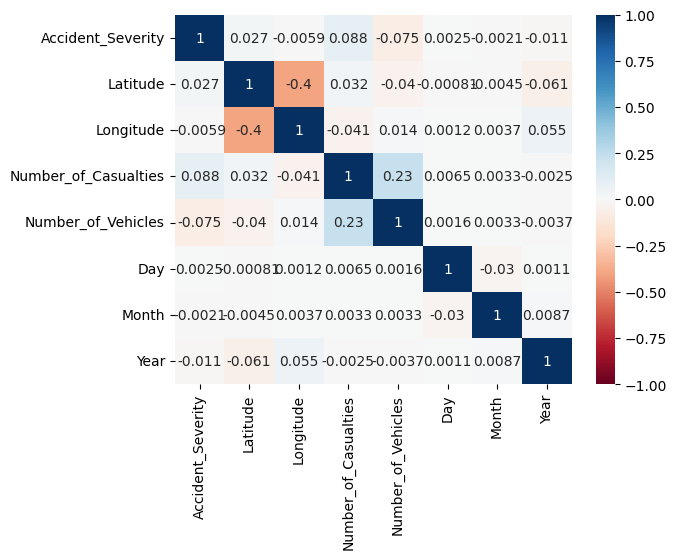

In [19]:
# plot a correlation heatmap to see the correlation between features
# seems like extremely low correlation between Accident Severity and all other columns
# highest is Number of Casualties, at 0.088
sns.heatmap(accident_copy.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

## Encoding

In [20]:
# Use One Hot Encoder on all categorical columns except Weather_Conditions
from sklearn.preprocessing import OneHotEncoder
# categorical columns include Light_Conditions, District_Area,
# Road_Surface_Conditions, Road_Type,	Urban_or_Rural_Area,
# Weather_Conditions, Vehicle_Type

categorical = ['Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',	'Urban_or_Rural_Area', 'Vehicle_Type']

for col in categorical:
  ohe = OneHotEncoder()
  categorical_ohe = ohe.fit_transform(accident_copy[[col]]).toarray()
  df = pd.DataFrame(categorical_ohe, columns=list(ohe.categories_[0]))
  print(df)

        Darkness - lights lit  Darkness - lights unlit  \
0                         1.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
638020                    0.0                      0.0   
638021                    0.0                      0.0   
638022                    0.0                      0.0   
638023                    0.0                      0.0   
638024                    0.0                      0.0   

        Darkness - no lighting  Daylight  
0                          0.0       0.0  
1                          0.0       1.0  
2                          0.0       1.0  
3                          0.0       1.0  
4                          0.0       1.0  
...                        ...       ...  
63

In [27]:
# use MultiLabelBinarizer on Weather_Conditions??
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
weather = mlb.fit_transform(accident_copy['Weather_Conditions'])
# one for everything that was in the weatehr condition that day
pd.DataFrame(weather, columns=mlb.classes_)

,Fine,Fog or mist,High winds,Other,Raining,Snowing
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
638020,1,0,0,0,0,0
638021,1,0,0,0,0,0
638022,1,0,0,0,0,0
638023,1,0,0,0,0,0
